In [1]:
import numpy as np

In [2]:
import pandas as pd

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t,t+1} = \frac{P_{t+1}}{P_{t}} - 1 $$

In [3]:
prices = pd.DataFrame({"BLUE": [8.70000,8.9055,8.7113,8.4346,8.7254,9.0551,8.9514,9.2439,9.1276,9.3976,9.4554,9.5704,9.7728],
                       "ORANGE":[10.6600,11.0828,10.7100,11.5907,12.1070,11.7876,11.2078,12.5192,13.3624,14.4080,11.9837,12.2718,11.5892] 
                      })

In [4]:
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [5]:
prices/prices.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


## Best Way ##

In [6]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [7]:
 returns = prices.pct_change()

In [8]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


<AxesSubplot:>

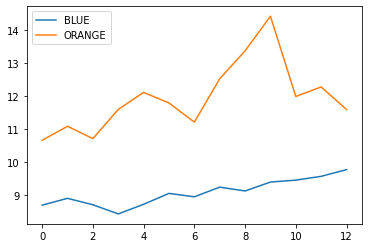

In [9]:
prices.plot()

<AxesSubplot:>

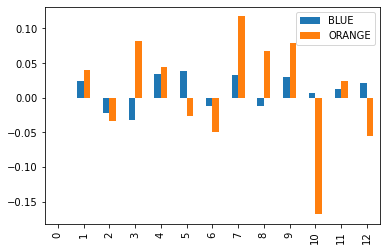

In [10]:
returns.plot.bar()

In [11]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [12]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [13]:
np.prod(returns+1)-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [14]:
(returns+1).prod()-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [15]:
(((returns+1).prod()-1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

## Annualization of Return ##

In [16]:
rm = 0.01
(1+rm)**12 - 1

0.12682503013196977

In [17]:
rq = 0.04
(1+rq)**4 - 1

0.1698585600000002

In [18]:
rd = 0.0001
(1+rd)**252 - 1

0.025518911987694626

## Risk ##

$$ Sharpe Ratio (P) = \frac{R_{p}-R{f}}{σ_{p}} $$

In [19]:
returns = returns.dropna()

In [20]:
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [21]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [22]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
number_of_obs = returns.shape[0]
variance = squared_deviations.sum()/(number_of_obs - 1)
volatility = np.sqrt(variance)
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [23]:
annualized_volatility = returns.std()*np.sqrt(12)
annualized_volatility

BLUE      0.083060
ORANGE    0.275747
dtype: float64

## Exercise with Portfolio Returns ##

In [39]:
portfolio_returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                               header=0,index_col=0,parse_dates=True,na_values=-99.99)


In [41]:
portfolio_returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [42]:
columns = ['Lo 20','Hi 20']
portfolio_returns = portfolio_returns[columns]
portfolio_returns.head()

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16


In [57]:
portfolio_returns = portfolio_returns/100
portfolio_returns.head()

,Lo 20,Hi 20
192607,-0.000057,0.000333
192608,0.000384,0.000233
192609,-0.000048,-0.000009
192610,-0.000329,-0.000295
192611,-0.000055,0.000316


In [71]:
portfolio_returns.columns = ["SmallCap","LargeCap"]
portfolio_returns.head()

,SmallCap,LargeCap
192607,-0.000057,0.000333
192608,0.000384,0.000233
192609,-0.000048,-0.000009
192610,-0.000329,-0.000295
192611,-0.000055,0.000316


<AxesSubplot:>

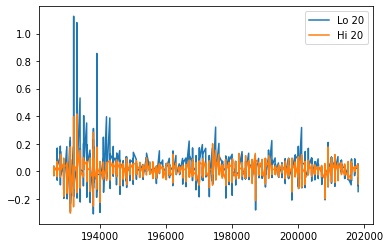

In [44]:
portfolio_returns.plot.line()

In [58]:
portfolio_returns.std()

Lo 20    0.000972
Hi 20    0.000563
dtype: float64

In [80]:
annualized_vol = portfolio_returns["1998":"2016"].std()*np.sqrt(12)
annualized_vol

SmallCap    0.003367
LargeCap    0.001951
dtype: float64

In [47]:
n_months = portfolio_returns.shape[0]
return_per_month = (portfolio_returns+1).prod()**(1/n_months) - 1
return_per_month

Lo 20    0.011860
Hi 20    0.007859
dtype: float64

In [88]:
annualized_return = (return_per_month+1)**12 - 1
annualized_return


Lo 20    0.151977
Hi 20    0.098490
dtype: float64

In [68]:
annualized_return = (portfolio_returns+1).prod()**(12/n_months) - 1
annualized_return

Lo 20    0.001904
Hi 20    0.001131
dtype: float64

In [35]:
annualized_return/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [36]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

In [83]:
annualized_vol["1998":"2016"].max()

nan